In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

* **1. Load "digits" datasets from SKlearn and print the dimension of the dataset.  Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.**

In [216]:
digits = datasets.load_digits()

In [217]:
#Get features and label
X = digits.data
y = digits.target

In [218]:
#Check dimension of the dataset
X.shape

(1797, 64)

In [219]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [220]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
sc = StandardScaler()

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [225]:
sc.fit(X)

StandardScaler()

In [226]:
#Standardise the dataset
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [227]:
from sklearn.decomposition import PCA

In [228]:
pca = PCA(n_components=3)

In [229]:
reduced_train_data = pca.fit_transform(X_train_scaled)
reduced_test_data = pca.transform(X_test_scaled)

In [230]:
reduced_train_data

array([[ 1.2826787 , -0.08044108,  4.38756355],
       [-1.50761074,  1.44054355,  1.08808928],
       [ 3.30695477,  0.60240837, -2.19950773],
       ...,
       [ 0.51115998, -1.53896383, -0.25626968],
       [-2.63699431, -1.19824784, -2.38696102],
       [ 5.45852988, -3.56902986,  0.12205368]])

In [231]:
#Check the size of the train data after dimensional reduction
reduced_train_data.shape

(1257, 3)

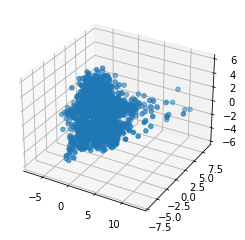

In [232]:
#Plot reduced train data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_train_data[:,0], reduced_train_data[:,1], reduced_train_data[:,2])
plt.show()

* **2.Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters.**

In [233]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [234]:
#try kernel = rbf
svc_rbf = svm.SVC(kernel='rbf', gamma=0.001)

In [235]:
svc_rbf.fit(reduced_train_data,y_train)

SVC(gamma=0.001)

In [236]:
print('Accuracy Score - Train data: {}'.format(accuracy_score(y_train, svc_rbf.predict(reduced_train_data))))
print('Accuracy Score - Test Data: {}'.format(accuracy_score(y_test, svc_rbf.predict(reduced_test_data))))

Accuracy Score - Train data: 0.6953062848050915
Accuracy Score - Test Data: 0.7018518518518518


In [237]:
print('Classification Report: {}'.format(classification_report(y_test, svc_rbf.predict(reduced_test_data))))

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.63      0.84      0.72        55
           2       0.88      0.76      0.81        49
           3       0.58      0.74      0.65        54
           4       0.93      0.93      0.93        61
           5       0.35      0.24      0.28        59
           6       0.98      0.96      0.97        46
           7       0.71      0.71      0.71        56
           8       0.59      0.22      0.32        59
           9       0.51      0.81      0.63        48

    accuracy                           0.70       540
   macro avg       0.70      0.71      0.69       540
weighted avg       0.70      0.70      0.68       540



In [238]:
#Let's try KFold Cross validation
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, random_state=101, shuffle=True)

svc_rbf = svm.SVC(kernel='rbf', gamma=0.001)

acc_score = []

#Dimension reduction
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)

#Split train, test dataset using KFold
for train_idx , test_idx in kf.split(X_transformed):
    X_train , X_test = X_transformed[train_idx], X_transformed[test_idx]
    y_train , y_test = y[train_idx] , y[test_idx]
     
    svc_rbf.fit(X_train,y_train)
    pred = svc_rbf.predict(X_test)
     
    acc = accuracy_score(pred , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Avg accuracy : {}'.format(avg_acc_score))


Avg accuracy : 0.7484916201117319


The accuracy score of using normal train test split is a little bit lower than KFold (70% compared to 75%)